In [ ]:
# created by GO May 2023
# purpose: create figs showing location and symbols for reference of LH and buoys in domain
# 
# notes: 
# - 20230529 - rotation of map code not working, deprecated. See 'rotated map' notebook. 


In [29]:
# work in progress
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import os 
import numpy as np
import netCDF4 as nc
import datetime as dt

import cartopy
from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.patches import Rectangle

from shapely import geometry
import cartopy as crt

In [ ]:
# clipped using cdo sellatlonbox
folder_path = "C:\\Users\\Greig\\Downloads\\"  
file_name = "SalishSea1500-RUN203_1h_grid_T_y1980m01_clipped.nc"   
full_file_path = folder_path + "\\" + file_name        
mod = xr.open_dataset(full_file_path)
mod_coord = mod.get(['nav_lat','nav_lon'])



In [135]:
folder_path = "..\\data\\evaluation\\"  
file_name = "LighthousesAndClosestTG.csv"
full_file_path = folder_path + "\\" + file_name        
#LH_f = xr.open_dataset(full_file_path)
LH_df = pd.read_csv(full_file_path)
LH_df = LH_df.drop_duplicates(subset=['name'])
LH_df = LH_df.drop((LH_df[LH_df.LH_ID == 11].index))
LH_df = LH_df.drop((LH_df[LH_df.LH_ID == 2].index))
LH_df = LH_df.drop((LH_df[LH_df.LH_ID == 1].index))
LH_df = LH_df.reset_index(drop=True)
print(LH_df)

   FID      lat       lon  LH_ID                           name  \
0    0  48.2979 -123.5316      7        race_rocks_lightstation   
1    1  48.3767 -123.9210      8  sheringham_point_lightstation   
2    4  48.8730 -123.2920      0       active_pass_lightstation   
3    6  49.2092 -123.8081      6   entrance_island_lightstation   
4    7  49.2103 -123.9554      5            departure_bay_(pbs)   
5    8  49.3405 -123.2328     10           west_van_labs_(caer)   
6    9  49.4720 -124.6845      4     chrome_island_lightstation   
7   10  49.4861 -124.4350      9    sisters_islets_lightstation   
8   11  49.9985 -125.1958      3        cape_mudge_lightstation   

               ClosestTG  TG_ID  MIN_YEAR  MAX_YEAR  rank_close  
0       Pedder Bay, B.C.   7080      1967      1969           1  
1           Sooke , B.C.   7020      1972      2011           1  
2       Whaler Bay, B.C.   7532      1967      2002           1  
3  Nanaimo Harbour, B.C.   7917      1976      2021           1  

In [140]:
# wasted time trying to get map coords for labels
lon, lat = LH_df['lon'][:].reset_index(drop=True), LH_df['lat'][:].reset_index(drop=True)
trans = crs.Mercator(np.mean(xlim), *ylim)._as_mpl_transform(ax)


i = 0
for l in lat:
    
    x1 = lon[i]
    y1 = lat[i]
    x2, y2 = trans.transform_point((x1,y1))
    
    print(LH_df['name'][i])
    print(x2,y2)
    i += 1

race_rocks_lightstation
461.1593454035142 -4236.819616401968
sheringham_point_lightstation
461.15905963938684 -4236.819558573994
active_pass_lightstation
461.1595212357815 -4236.819194360495
entrance_island_lightstation
461.1591424919035 -4236.818947637589
departure_bay_(pbs)
461.15903439468735 -4236.818946830345
west_van_labs_(caer)
461.1595646801481 -4236.818851282093
chrome_island_lightstation
461.15849933915257 -4236.818754779827
sisters_islets_lightstation
461.15868243660964 -4236.818744432436
cape_mudge_lightstation
461.15812411779075 -4236.81836840383


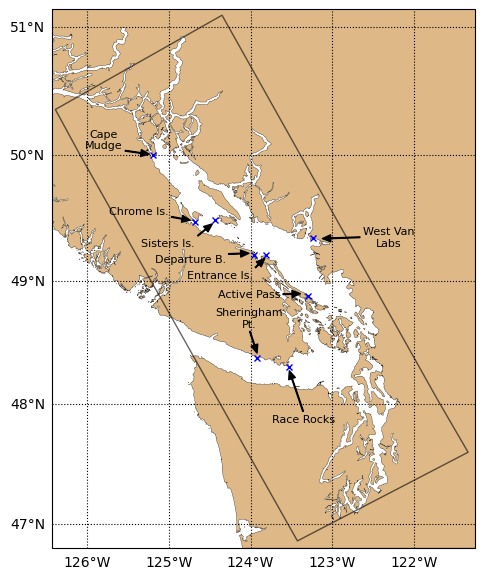

In [240]:
alpha = 0.5 # for point transparency - GO
markersize = 4
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

subdomain = [114, 397, 334, 897]
fig = plt.figure(figsize=(9, 7))
gs = plt.GridSpec(1, 1) #, width_ratios=[1.8, 1], wspace=0.13)

# plt.scatter(longitudes, latitudes, c=data, transform=ccrs.PlateCarree()) 

# Map Left
#xlim, ylim = [-126, -123], [48.6, 50.1]
xlim, ylim = [-126.43,-121.25], [46.8,51.14]
ax = fig.add_subplot(gs[0], projection=crs.Mercator(np.mean(xlim), *ylim))
ax.set_extent(xlim + ylim)
#full (low for easy render)
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='burlywood', linewidth=0.2))

# model boundary rect
verts=[[-126.39, 50.36007],[-124.34939, 51.092396], [-121.33768, 47.5994],[-123.42677, 46.86]]
poly = geometry.polygon.Polygon(verts)
ax.add_geometries([poly,],crs=crt.crs.PlateCarree(),facecolor='None', edgecolor='k',
                         lw=1, zorder=2, alpha=0.6)

# Sample data
# np.random.seed(1)
# x = np.random.normal(size = 4)
# y = x + np.random.normal(size = 4)
# ax.hist2d(x, y, alpha = 0.5)

#scalebar = AnchoredSizeBar(ax.transData,
#                            20000, '20 km', 'lower center', 
#                            pad=0.1,
#                            color='black',
#                            frameon=False,
#                            size_vertical=1)

# === GRATICULE ===
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
#xlocs = [-123, -123.2, -123.4, -123.6, -123.8, -124, -124.2, -124.4, -124.6, -124.8, -125]
xlocs = [-122, -123, -124, -125, -126]
#ylocs = [48.6, 48.7, 48.8, 48.9, 49, 49.1, 49.2, 49.3, 49.4, 49.5, 49.6, 49.7, 49.8, 49.9, 50]
ylocs = [46, 47, 48, 49, 50, 51]

gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

#ax.add_artist(scalebar)

ax.annotate('Race Rocks',xy=(0.35e5,6.12e6),xytext=(0.12e5,6.05e6),
            arrowprops=dict(facecolor='black', width=0.5,headwidth=5,headlength=6),fontsize=8)
ax.annotate('Sheringham\nPt.',xy=(-0.09e5,6.144e6),xytext=(-0.2e5,6.18e6),           
            arrowprops=dict(facecolor='black', width=0.5,headwidth=5,headlength=6),fontsize=8,ha='center')
ax.annotate('Active Pass',xy=(0.5e5,6.225e6),xytext=(-0.2e5,6.22e6),
            arrowprops=dict(facecolor='black', width=0.5,headwidth=5,headlength=6),fontsize=8,ha='center')
ax.annotate('Departure B.',xy=(-0.2e5,6.28e6),xytext=(-1e5,6.268e6),
            arrowprops=dict(facecolor='black', width=0.5,headwidth=5,headlength=6),fontsize=8,ha='center')
ax.annotate('Entrance Is.',xy=(0.015e5,6.273e6),xytext=(-0.6e5,6.246e6),
            arrowprops=dict(facecolor='black', width=0.5,headwidth=5,headlength=6),fontsize=8,ha='center')
ax.annotate('West Van\nLabs',xy=(0.8e5,6.3e6),xytext=(1.7e5,6.29e6),
            arrowprops=dict(facecolor='black', width=0.5,headwidth=5,headlength=6),fontsize=8,ha='center')
ax.annotate('Chrome Is.',xy=(-1e5,6.325e6),xytext=(-1.7e5,6.333e6),
            arrowprops=dict(facecolor='black', width=0.5,headwidth=5,headlength=6),fontsize=8,ha='center')
ax.annotate('Sisters Is.',xy=(-0.7e5,6.320e6),xytext=(-1.3e5,6.29e6),
            arrowprops=dict(facecolor='black', width=0.5,headwidth=5,headlength=6),fontsize=8,ha='center')
ax.annotate('Cape\nMudge',xy=(-1.56e5,6.415e6),xytext=(-2.18e5,6.423e6),
            arrowprops=dict(facecolor='black', width=0.5,headwidth=5,headlength=6),fontsize=8,ha='center')


# ax.annotate('Johnstone\nStrait',xy=(-2.35e5,6.49e6),xytext=(-2.25e5,6.56e6),
#             arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8,ha='center')
# ax.annotate('Strait of\nJuan de Fuca',xy=(-0.23e5,6.13e6),xytext=(-2.0e5,6.18e6),
#             arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8,ha='center',va='center')
# ax.annotate('Puget\nSound',xy=(1.45e5,6.06e6),xytext=(2.45e5,6.06e6),
#             arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8,ha='center',va='center')
# ax.annotate('San Juan/\nGulf Islands',xy=(1.0e5,6.19e6),xytext=(2.35e5,6.24e6),
#             arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8,ha='center',va='center')

# ax.text(0.15, 0.1, 'Pacific\nOcean', weight='bold', fontsize = 12, transform=ax.transAxes)
# ax.text(0.32, 0.307, 'Juan de Fuca', weight='bold', transform=ax.transAxes, rotation=-19.5)
# ax.text(0.555, 0.305, 'Strait', weight='bold', transform=ax.transAxes, rotation=10.5)
# ax.text(0.82, 0.18, 'Puget\nSound', weight='bold', transform=ax.transAxes)

# ax.text(0.355, 0.4851, 'Strait of Georgia', weight='bold', transform=ax.transAxes, rotation=-30, color='w')
# #ax.text(0.010, 0.755, 'Johnstone', weight='bold', transform=ax.transAxes, rotation=-20)
# ax.text(0.015, 0.740, 'Johnstone \n Strait ', weight='bold', transform=ax.transAxes, rotation=-0)
# #ax.text(0.16, 0.675, 'Strait', weight='bold', transform=ax.transAxes, rotation=-60)

# ax.text(0.44, 0.38, 'Haro\nStrait', weight='bold', transform=ax.transAxes)
# ax.text(0.72, 0.55, 'Fraser\nRiver', weight='bold', transform=ax.transAxes)
# ax.text(0.35, 0.9, 'Bute Inlet', weight='bold', transform=ax.transAxes)
# ax.text(0.42, 0.80, 'Toba Inlet', weight='bold', transform=ax.transAxes)
# ax.text(0.53, 0.75, 'Jervis Inlet', weight='bold', transform=ax.transAxes)
# ax.text(0.60, 0.67, 'Howe Sound', weight='bold', transform=ax.transAxes)
# ax.text(0.11, 0.64, 'Texada Island', weight='bold',fontstyle="italic", 
#         color = 'k', fontsize = 10, transform=ax.transAxes)

# obs
#ax.plot(all_obs_coords['longitude'][:], all_obs_coords['latitude'][:], 'b+', transform=crs.PlateCarree(), alpha=alpha, markersize=markersize)
# clipped model pts
#ax.plot(mod_coord['nav_lon'][:], mod_coord['nav_lat'][:], 'ro', transform=crs.PlateCarree(), alpha=1, markersize=markersize)
#ax.plot(np.array(clip_coords)[:,0], np.array(clip_coords)[:,1], 'bo', transform=crs.PlateCarree(), alpha=1, markersize=markersize)
#ax.plot(mod_coord_idx['nav_lon'][:], mod_coord_idx['nav_lat'][:], 'go', transform=crs.PlateCarree(), alpha=1, markersize=markersize)
ax.plot(LH_df['lon'][:], LH_df['lat'][:], 'bx', transform=crs.PlateCarree(), alpha=1, markersize=markersize)


#Map Inset
# xmap, ymap = [-160, -119], [45, 62]
# ax2 = fig.add_axes([0.555, 0.75, 0.24, 0.2], projection=crs.LambertConformal(np.mean(xmap), np.mean(ymap)))
# ax2.set_extent(xmap + ymap)
# ax2.add_feature(feature.GSHHSFeature('low', edgecolor='k', facecolor='darkgray', linewidth=0.1))
# ax2.add_patch(Rectangle(
#     (xlim[0], ylim[0]), int(np.diff(xlim))+1, int(np.diff(ylim))+1,
#     transform=crs.PlateCarree(), fill=False, edgecolor='r', zorder=10, linewidth=2
# ))

# ax2.text(0.34, 0.5, 'Gulf of\nAlaska', transform=ax2.transAxes)
# ax2.text(0.77, 0.55, 'Canada', transform=ax2.transAxes)
# ax2.text(0.15, 0.9, 'USA', transform=ax2.transAxes)

# xticks, yticks = list(range(-170, -100, 10)), list(range(40, 80, 10))
# ax2.gridlines(linestyle=":", color='k', xlocs=xticks, ylocs=yticks)
# ax2.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
# ax2.yaxis.set_major_formatter(LATITUDE_FORMATTER)



fig.canvas.draw()

#ax.set_title('Nanoose CTD observation location (red) \n on standard Salish Sea map',zorder = 100)

#lct.lambert_xticks(ax, xticks)
#lct.lambert_yticks(ax, yticks)

# # Colorbar
# cax = fig.add_axes([0.15, 0.06, 0.73, 0.025])
# fig.colorbar(c, cax=cax, orientation='horizontal', label='surface diatom concentration (mmol N m$^{-3}$)')

# fig.savefig('./paper_figs/MF01-domain.jpg', bbox_inches='tight', dpi = 300)

In [127]:
#from mpl_toolkits.mplot3d import proj3d

#proj3d.proj_transform(LH_df['lon'][:], LH_df['lat'][:],0, crs.LambertConformal())




0   -123.5316
1   -123.9210
2   -123.2920
3   -123.8081
4   -123.9554
5   -123.2328
6   -124.6845
7   -124.4350
8   -125.1958
Name: lon, dtype: float64
9
-123.8081
-123.5316
2735.4561848940752 -791.5115493335479
-123.921
2735.4558156529133 -791.5114746190166
-123.292
2735.4564120809137 -791.5110040040277
-123.8081
2735.4559226953706 -791.5106852174731
-123.9554
2735.455783021355 -791.5106841766305
-123.2328
2735.456468209037 -791.5105607065129
-124.6845
2735.455091664296 -791.5104360363121
-124.435
2735.4553282470015 -791.5104226625313
-125.1958
2735.454606827269 -791.5099368019223


#sample code

In [3]:
import numpy as np
import netCDF4 as nc
import os
from matplotlib import pyplot as plt
from matplotlib import ticker
import matplotlib.gridspec as gridspec
import cartopy as crt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cmocean
import datetime as dt
from shapely import geometry
import sys
sys.path.insert(0, '/ocean/eolson/MEOPAR/northernNO3PaperCalcs/notebooks/')
#import NorthNut as nn
#from salishsea_tools.places import PLACES
import matplotlib as mpl
mpl.rc('xtick', labelsize=8)
mpl.rc('ytick', labelsize=8)
mpl.rc('legend', fontsize=8)
mpl.rc('axes', titlesize=8)
mpl.rc('axes', labelsize=8)
mpl.rc('figure', titlesize=8)
mpl.rc('font', size=8)
#mpl.rc('text', usetex=True)

#mpl.rc('text.latex', preamble = ','.join(r'''
# \usepackage{txfonts}
# \usepackage{lmodern}
# '''.split()))
mpl.rc('font', family='sans-serif', weight='normal', style='normal')
%matplotlib inline

In [1]:
# https://github.com/e-olson/NSOGNO3/blob/master/notebooks/MapForPaper.ipynb
# temp = nc.Dataset('..//..//data//basemap//BathSmooth_2km.nc')
# temp = nc.Dataset('..//..//data//basemap//BathSmooth_500m_May2020.nc')
# print(temp.variables)
# temp.close()

In [18]:
#with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
with nc.Dataset('..//data//bathymetry//bathy_salishsea_1500m_20210706.nc') as mesh:
   # print(mesh.variables)
    navlon=mesh.variables['nav_lon'][:]
    navlat=mesh.variables['nav_lat'][:]
    bathy=mesh.variables['Bathymetry'][:]
#     bathy=np.sum(mesh.variables['bathymetry'][0,:])#*mesh.variables['e3t_0'][0,:,:,:],0)

    tmask=mesh.variables['Bathymetry'][:,:]

In [19]:
np.shape(tmask)
# tmask2=tmask[0,:]
# tmask[1:]=np.maximum(tmask[])
# bathy[100,100]
tmask.data == -10

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [37]:
navlat

masked_array(
  data=[[46.864815, 46.870636, 46.876358, ..., 47.588272, 47.593838,
         47.5994  ],
        [46.87496 , 46.881054, 46.88698 , ..., 47.6004  , 47.605965,
         47.61153 ],
        [46.885437, 46.89163 , 46.89768 , ..., 47.61252 , 47.618088,
         47.623653],
        ...,
        [50.36007 , 50.36612 , 50.372128, ..., 51.059734, 51.06467 ,
         51.069588],
        [50.371994, 50.378075, 50.384098, ..., 51.071182, 51.076096,
         51.08098 ],
        [50.383976, 50.39009 , 50.39612 , ..., 51.082653, 51.087543,
         51.092396]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

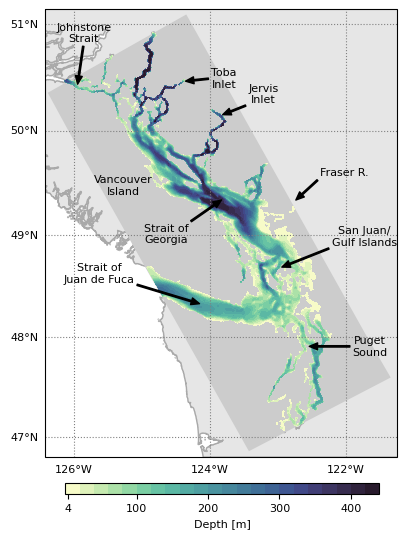

In [42]:
fig = plt.figure(figsize=(7.48,5.3))
#gs = gridspec.GridSpec(1,2,left=.1,right=.9,hspace=1,wspace=1,bottom=.1,top=.9)
gs = fig.add_gridspec(1,2,left=.1,right=.9,hspace=1,wspace=1,bottom=.1,top=.9)
cax = fig.add_axes([0.079, 0.075, 0.42, 0.02])
xlim,ylim=[-126.43,-121.25],[46.8,51.14]
ax0 = fig.add_axes([0.052, 0.104, 0.47, 0.925],projection=crt.crs.Mercator(np.mean(xlim), *ylim))
#ax1 = fig.add_axes([0.532, 0.01, 0.46, 0.98])
ax0.set_extent(xlim + ylim)
imap=True
if imap==True:
    ax0.add_feature(crt.feature.GSHHSFeature('full', edgecolor='darkgray', facecolor=(.9,.9,.9)))
#     verts=[[navlon[0,0]+.01,navlat[0,0]+.01*(navlat[0,0]-navlat[-1,0])/(navlon[0,0]-navlon[-1,0])],
#            [navlon[0,-1]+.01,navlat[0,-1]+.01*(navlat[0,-1]-navlat[-1,-1])/(navlon[0,-1]-navlon[-1,-1])],
#            [navlon[-1,-1]-.01,navlat[-1,-1]-.01*(navlat[0,-1]-navlat[-1,-1])/(navlon[0,-1]-navlon[-1,-1])],
#            [navlon[-1,0]-.01,navlat[-1,0]]-.01*(navlat[0,0]-navlat[-1,0])/(navlon[0,0]-navlon[-1,0])]

    # study area rectangle
    #verts=[[-125.46,49.86],[-124.33, 50.55],[-121.9,48.8], [-123, 48.1]]
    verts=[[-126.39, 50.36007],[-124.34939, 51.092396], [-121.33768, 47.5994],[-123.42677, 46.86]]
    
    #TL -126.39, 50.36007
    #TR -124.34939, 51.092396
    #BL -123.42677, 46.864815
    #BR- -121.33768, 47.5994
    poly = geometry.polygon.Polygon(verts)     
    #p=ax0.add_geometries([poly,],crs=crt.crs.PlateCarree(),facecolor=(.9,.9,.9), edgecolor=None,
    #                     lw=1, zorder=1)
    #p=ax0.add_geometries([poly,],crs=crt.crs.PlateCarree(),facecolor=(.9,.9,.9), color='None', 
    #                     edgecolor="darkgray",lw=1, zorder=10)
    p=ax0.add_geometries([poly,],crs=crt.crs.PlateCarree(),facecolor=(.8,.8,.8), edgecolor=None,
                         lw=1, zorder=2)

    # major lines of long and lat    
#    gl = ax0.gridlines(crs=crt.crs.PlateCarree(), draw_labels=True,
#                   linewidth=1, color='gray', alpha=1, linestyle=':')
    
#     c = ax0.contourf(navlon, navlat, bathy,25,vmin=4,vmax=430,
#         cmap=cmocean.cm.deep, transform=crt.crs.PlateCarree(), zorder=2) # zorder controls when object is drawn
    
    c = ax0.contourf(navlon, navlat, bathy,25,vmin=4,vmax=430,cmap=cmocean.cm.deep, 
                     transform=crt.crs.PlateCarree(), zorder=2) 
    mm=ax0.contour(navlon, navlat, tmask.data==-10,levels=[-0.01, 0.01], linewidths=1,
                   colors='darkgray', 
            transform=crt.crs.PlateCarree(), zorder=2)

#     mm=ax0.contour(navlon, navlat, tmask[0,:],levels=[-0.01, 0.01], linewidths=1,colors='darkgray', 
#                    transform=crt.crs.PlateCarree(), zorder=2)
    
#     p=ax0.plot(thlons,thlats,'r-', transform=crt.crs.PlateCarree(), linewidth=1)
    
    cbar=fig.colorbar(c, cax=cax, label='Depth [m]',ticks=[4,100,200,300,400],orientation='horizontal')
    cax.set_ylim((4/430,1))
    
    ax0.annotate('Fraser R.',xy=(1.23e5,6.3e6),xytext=(1.63e5,6.34e6),
            arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8)
    ax0.annotate('Strait of\nGeorgia',xy=(0.01e5,6.30e6),xytext=(-.9e5,6.23e6),
            arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8,ha='center')
    ax0.annotate('Toba\nInlet',xy=(-0.58e5,6.495e6),xytext=(0.05e5,6.485e6),
            arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8,ha='center')
    ax0.annotate('Jervis\nInlet',xy=(0.03e5,6.44e6),xytext=(0.7e5,6.46e6),
            arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8,ha='center')
    ax0.annotate('Johnstone\nStrait',xy=(-2.35e5,6.49e6),xytext=(-2.25e5,6.56e6),
            arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8,ha='center')
    ax0.annotate('Strait of\nJuan de Fuca',xy=(-0.35e5,6.13e6),xytext=(-2.0e5,6.18e6),
            arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8,ha='center',va='center')
    ax0.annotate('Puget\nSound',xy=(1.45e5,6.06e6),xytext=(2.45e5,6.06e6),
            arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8,ha='center',va='center')
    ax0.annotate('San Juan/\nGulf Islands',xy=(1.0e5,6.19e6),xytext=(2.35e5,6.24e6),
            arrowprops=dict(facecolor='black', width=1,headwidth=5,headlength=6),fontsize=8,ha='center',va='center')

    ax0.annotate('Vancouver\nIsland', xy=(-1.6e5,6.31e6), fontsize=8,ha='center')
    
    temp=ax0.get_xlim()
    temp2=ax0.get_ylim()
    xlocs=ticker.FixedLocator(np.arange(np.floor(xlim[0]-1), np.ceil(xlim[1])+2,2))
    ylocs = ticker.FixedLocator(np.arange(np.floor(ylim[0]), np.ceil(ylim[1])+1))
    gl = ax0.gridlines(linestyle=":", color='gray', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
    gl.xlabels_top, gl.ylabels_right = False, False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 8}
    gl.ylabel_style = {'size': 8}
    a=18
imap2=True